In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Training Data

In [29]:
x_train = np.linspace(-1,1,20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211, 0.60485 ])

In [30]:
x_test = np.linspace(-1,1,20)

In [31]:
x_test

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [32]:
x_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [33]:
y_test = np.array([

    -0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,  
    -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 , 
    0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
    0.3639 ,  0.5536 ,  0.3365 , 0.50705, 0.334355
    
    
])

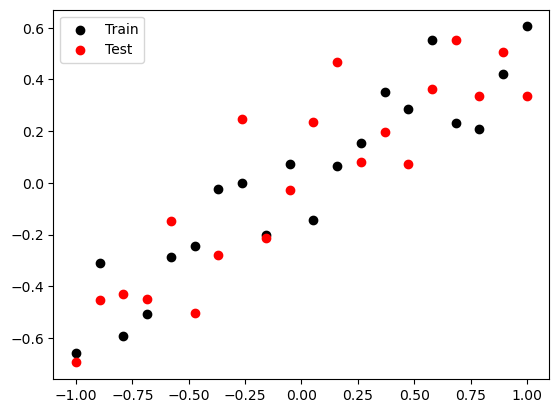

In [34]:
plt.scatter(x_train,y_train,c='black',label='Train')
plt.scatter(x_test,y_test,c='red',label='Test')
plt.legend()
plt.show()

## Regression Model

In [35]:
model = Sequential()
model.add(Dense(128, input_dim=1 , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1 , activation='linear'))

adam = Adam(learning_rate = 0.01)
model.compile(loss='mse',optimizer=adam, metrics = ['mse'])
history = model.fit(x_train , y_train , epochs = 500 , validation_data = (x_test , y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 0.1353 - mse: 0.1353 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0175 - mse:

In [36]:
_, train_mse = model.evaluate(x_train , y_train)
_, test_mse = model.evaluate(x_test , y_test)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.0814e-04 - mse: 9.0814e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0451 - mse: 0.0451
Train: 0.0009081390453502536, Test: 0.04507165402173996


In [37]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


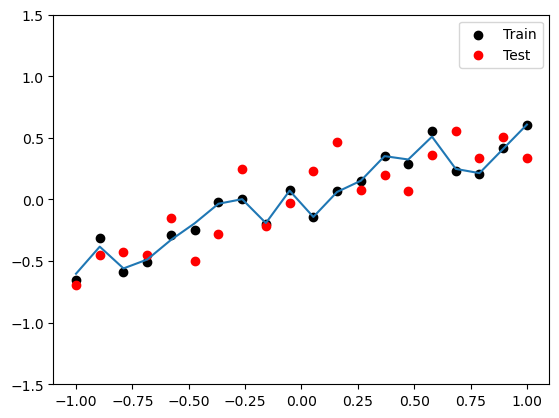

In [38]:
plt.figure()
plt.scatter(x_train,y_train,c='black',label='Train')
plt.scatter(x_test,y_test,c='red',label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

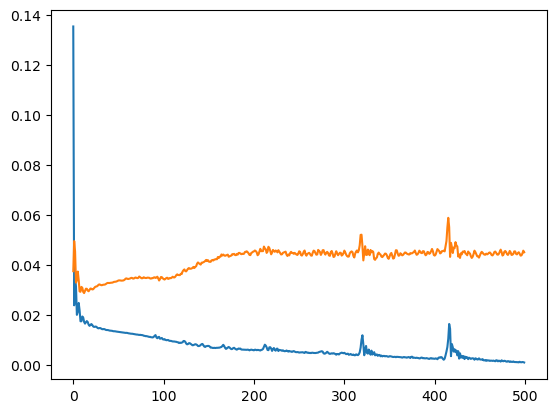

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Dropout Model

In [47]:
model = Sequential()
model.add(Dense(128, input_dim=1 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation='linear'))

adam = Adam(learning_rate = 0.01)
model.compile(loss='mse',optimizer=adam, metrics = ['mse'])
history = model.fit(x_train , y_train , epochs = 500 , validation_data = (x_test , y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1480 - mse: 0.1480 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0446 - mse: 0.

In [48]:
# evaluate the model
_, train_mse = model.evaluate(x_train , y_train)
_, test_mse = model.evaluate(x_test , y_test)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0144 - mse: 0.0144
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0321 - mse: 0.0321
Train: 0.014409080147743225, Test: 0.032056309282779694


In [49]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


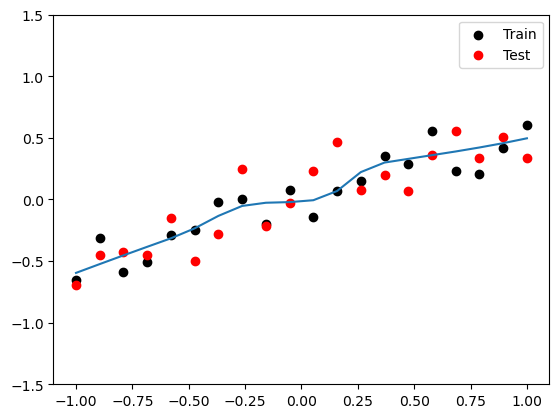

In [50]:
plt.figure()
plt.scatter(x_train,y_train,c='black',label='Train')
plt.scatter(x_test,y_test,c='red',label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

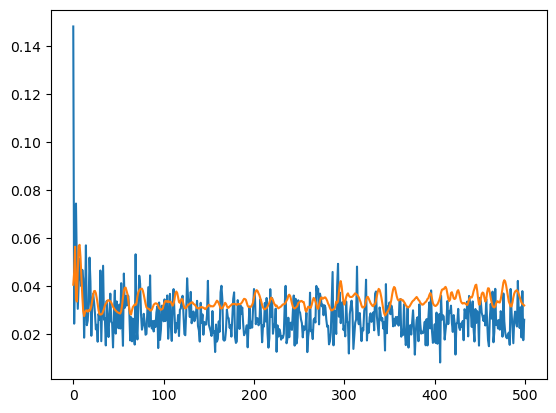

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])